In [141]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Reading data
data = pd.read_csv("seed.txt", header=None, sep="\s+", usecols=[2, 6, 7], names=['f1', 'f2', 'label'])
# Removing eneties from 3rd class
data = data[data.label != 3]
data["label"].replace({1: 0.,2: 1.}, inplace=True)
X = data[['f1','f2']].to_numpy()
y = data['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

The loss function (also known as a cost function) is a function that is used to measure how much your prediction differs from the labels. Binary cross entropy is the function that is used in this article for the binary logistic regression algorithm, which yields the error value.



In [143]:
def sigmoid(x):    
    return 1 / (1 + np.exp(-x))

def compute_loss(y, y_pred):
    y_zero_loss = y * np.log(y_pred)
    y_one_loss = (1-y) * np.log(1 - y_pred)
    return -np.mean(y_zero_loss + y_one_loss)

def train(x, y, alpha, weight, bias, iterations): 
    m = x.shape[0]
    loss_history = []
    for i in range(iterations): 
        y_pred = sigmoid(np.dot(x, weight) + bias)

        weight = weight - alpha * (1/m * np.dot(x.T, (y_pred - y)))
        bias = bias - alpha * (1/m * np.sum(y_pred - y))

        # loss = compute_loss(y, y_pred)
        loss = (-1/m) * np.sum((y.T @ np.log(y_pred)) + (1 - y).T @ np.log(1 - y_pred))
        loss_history.append(loss)
    
    return weight, bias, loss_history

def decision_boundary(x, weight, bias):
    return - (bias + np.dot(weight[0], x)) / weight[1]

def predict(x, weight, bias):
    P = sigmoid(np.dot(x, weight) + bias)
    mid_probs_num = np.sum([P==0.5])
    random_labels = np.random.randint(2, size = mid_probs_num)
    P[P == 0.5] = random_labels
    return (P > 0.5).astype(int)

In [144]:
weights = np.array(np.random.rand(X_train.shape[1]), dtype='float64')
weights = np.zeros(X.shape[1])
bias = 0
iterations = 25000
alpha = 0.25
m = len(y_train)

(weight, bias, loss_history) = train(X_train, y_train, alpha, weights, bias, iterations)

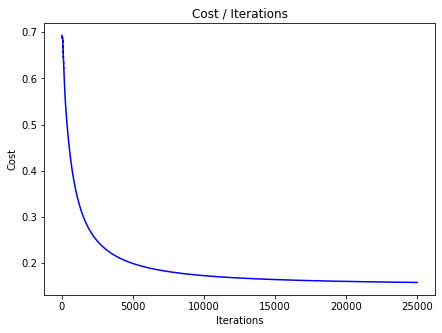

In [145]:
plt.figure(figsize=(7,5))
plt.plot(loss_history, 'b', markersize = 1)
plt.title('Cost / Iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

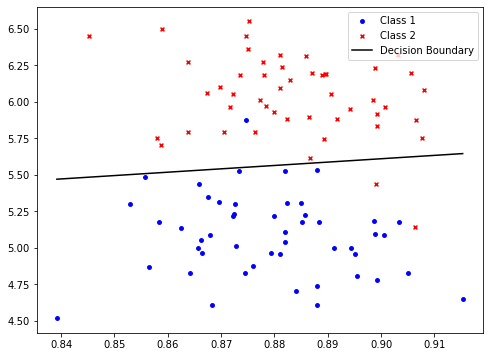

The parameter values w0 = -17.486836527219047, w1: = 7.588180913847407 and bias = -26.82907961034293
Train accuracy: 96.93877551020408
Train cost: 0.15832473634946026
Decision boundry with the format of "y = ax + b":


<IPython.core.display.Latex object>

In [146]:
from IPython.display import Latex

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], s=15, marker='o', c='b', label='Class 1')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], s=15, marker='x', c='r', label='Class 2')
x_values = [np.min(X_train[:, 0]), np.max(X_train[:,0])]
slope = -weight[0]/weight[1] 
intercept = -bias/weight[1] 
y_values = np.dot(slope, x_values) + intercept 
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.legend()
plt.show()

y_pred_values_train = predict(X_train, weight, bias)
train_accuracy = (sum(y_pred_values_train == y_train) / len(y_pred_values_train) * 100)

y_pred_train = sigmoid(np.dot(X_train, weight) + bias)
cost_train = compute_loss(y_train , y_pred_train)

print('The parameter values w0 = {}, w1: = {} and bias = {}'.format(weight[0], weight[1], bias))
print('Train accuracy: {}'.format(train_accuracy))
print('Train cost: {}'.format(cost_train))
print('Decision boundry with the format of "y = ax + b":')
Latex(f"""\\begin{{equation*}}
\\hat{{y}} = {{{slope}}}x_1 + {{{intercept}}}
\\end{{equation*}}
""")

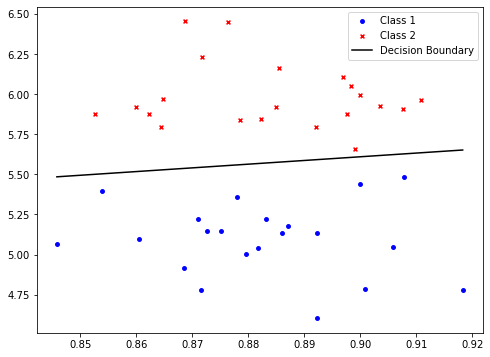

Test accuracy: 100.0
Test cost: 0.08241606290876946
Decision boundry with the format of "y = ax + b":


<IPython.core.display.Latex object>

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=15, marker='o', c='b', label='Class 1')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=15, marker='x', c='r', label='Class 2')
x_values = [np.min(X_test[:, 0]), np.max(X_test[:,0])]
y_values = decision_boundary(x_values, weight, bias)
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.legend()
plt.show()

y_pred_values_test = predict(X_test, weight, bias)
test_accuracy =  (sum(y_pred_values_test == y_test) / len(y_pred_values_test) * 100)

y_pred_test = sigmoid(np.dot(X_test, weight) + bias)
cost_test = compute_loss(y_test , y_pred_test)

print('Test accuracy: {}'.format(test_accuracy))
print('Test cost: {}'.format(cost_test))
print('Decision boundry with the format of "y = ax + b":')
Latex(f"""\\begin{{equation*}}
\\hat{{y}} = {{{slope}}}x_1 + {{{intercept}}}
\\end{{equation*}}
""")